# K-means clustering on iris dataset

we will be using only petal length and petal width as input variables just for simpler visualization

In [1]:
from sklearn import datasets, preprocessing
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
# iris.feature_names[1]

In [6]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm')

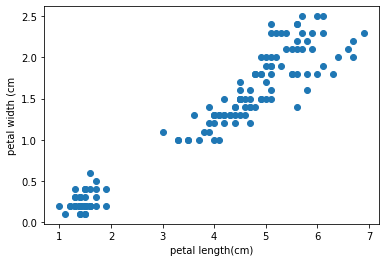

In [7]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)']) #scatter plotting of 2 variables
plt.xlabel('petal length(cm)')
plt.ylabel('petal width (cm')

##### Training our model

In [8]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3)
# Here n_clusters = number of clusters to be formed

In [10]:
y_predicted=km.fit_predict(df) #here ,as there is no feature and label so we try to do clustering of groups
y_predicted                    #so training and prediction is done at the same time

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [12]:
km.cluster_centers_                    

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

These are the centroids of the clusters formed

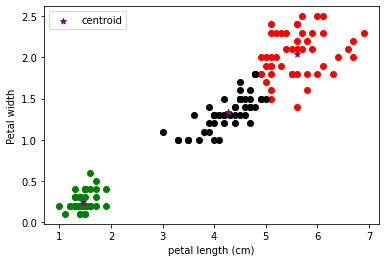

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('Petal width')
plt.legend()

after calculating clusters info we try to visualize the clusters on graph, if the sacling of graph doesnt seems good we scale our data(0-1 ki range m le aate h ) for better visualizitation.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['petal length(cm)']])

df['petal length(cm)'] = scaler.transform(df[['petal length(cm)']])

scaler.fit(df[['petal width (cm)']])

df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

### Elbow point

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

C:\Users\Shubham patidar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[652.8686666666667,
 112.32079999999999,
 31.371358974358966,
 22.649637861231323,
 14.197400098993569,
 11.412196969696973,
 9.281343349632822,
 7.808610729311969,
 6.850950742240214]

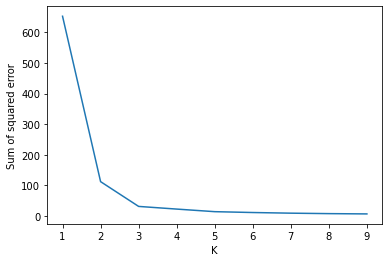

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

so on visualizing we can observe that elbow value for the cluster is 2 or 3.